
# The following Python code snippet demonstrates a machine learning classification task using various algorithms. It utilizes libraries such as matplotlib, seaborn, pandas, and scikit-learn for data visualization, data preprocessing, and model training. The goal is to predict loan approval status using different classifiers and evaluate their performance using accuracy and classification reports.



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the dataset
data = pd.read_csv('loan_approval_dataset.csv')

In [48]:
# View the first few rows of the datase
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### Missing Data Analysis

In [4]:
data.isnull().mean()

loan_id                      0.0
 no_of_dependents            0.0
 education                   0.0
 self_employed               0.0
 income_annum                0.0
 loan_amount                 0.0
 loan_term                   0.0
 cibil_score                 0.0
 residential_assets_value    0.0
 commercial_assets_value     0.0
 luxury_assets_value         0.0
 bank_asset_value            0.0
 loan_status                 0.0
dtype: float64

### Dataset Summary Statistics


In [5]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# Loan Status by Education Level

<Figure size 800x600 with 0 Axes>

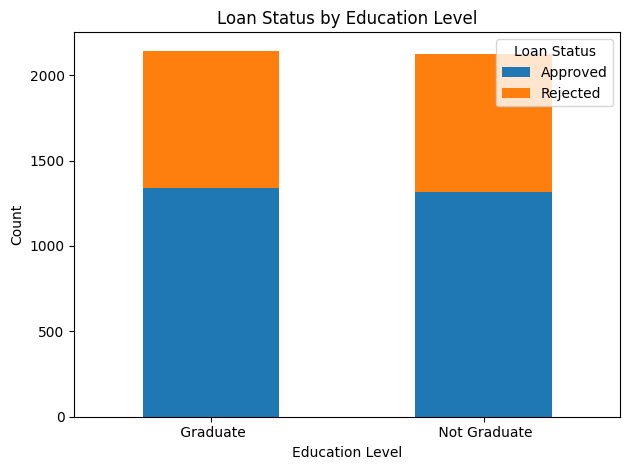

In [7]:
# Check for leading/trailing whitespaces in the column names
data.columns = data.columns.str.strip()

if 'education' in data.columns and 'loan_status' in data.columns:
    # Group the data by 'education' and 'loan_status' and count the occurrences
    education_loan_status_counts = data.groupby(['education', 'loan_status']).size().unstack()

    # Plot the bar chart
    plt.figure(figsize=(8, 6))
    education_loan_status_counts.plot(kind='bar', stacked=True)
    plt.title('Loan Status by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right', labels=['Approved', 'Rejected'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [8]:
data.education.value_counts()

education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [10]:
data.loan_status.value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

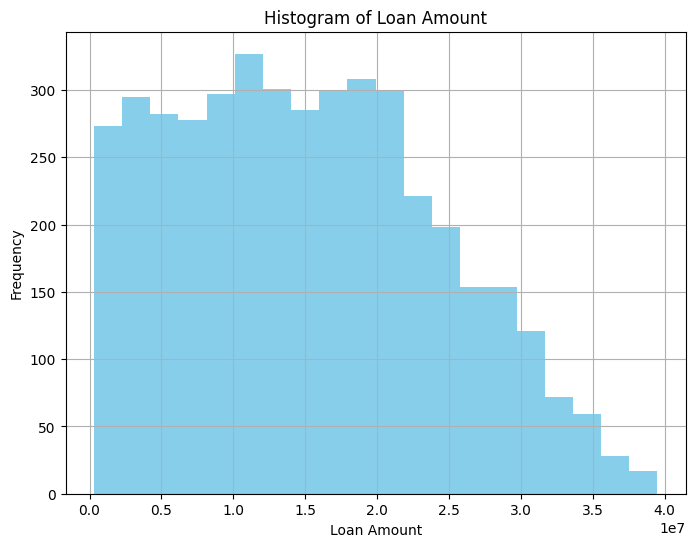

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(data['loan_amount'], bins=20, color='skyblue')
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


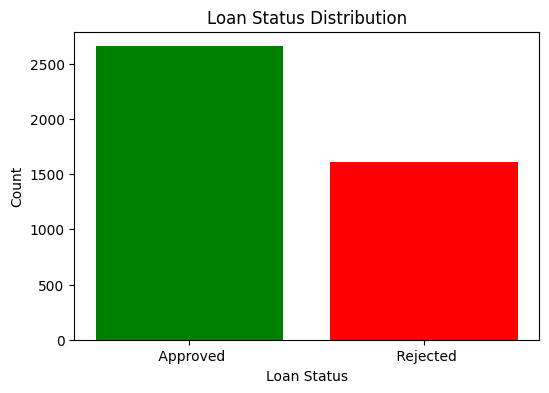

In [12]:
loan_status_counts = data['loan_status'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(loan_status_counts.index, loan_status_counts.values, color=['green', 'red'])
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


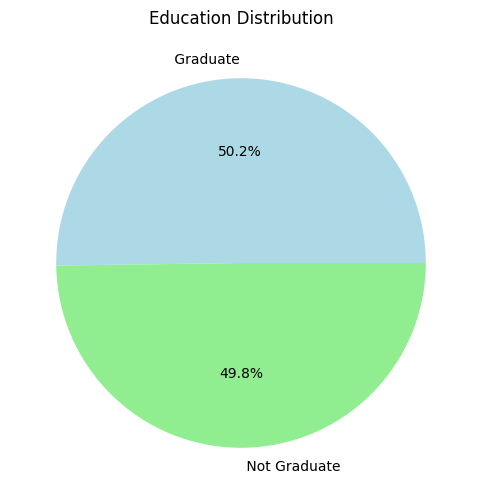

In [14]:


education_counts = data['education'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Education Distribution')
plt.show()


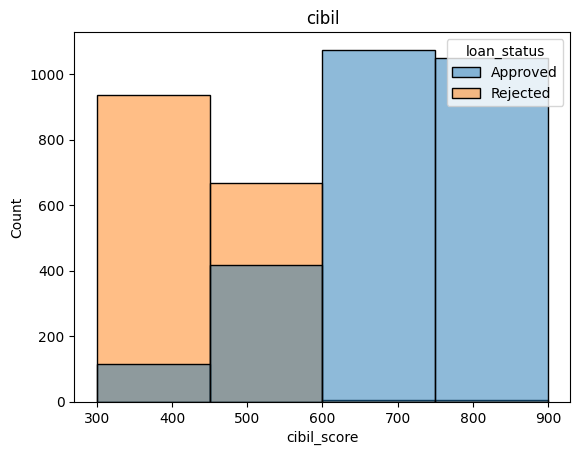

In [28]:
sns.histplot(data=data,x='cibil_score',bins=4,hue='loan_status')
plt.title('cibil')
plt.show()

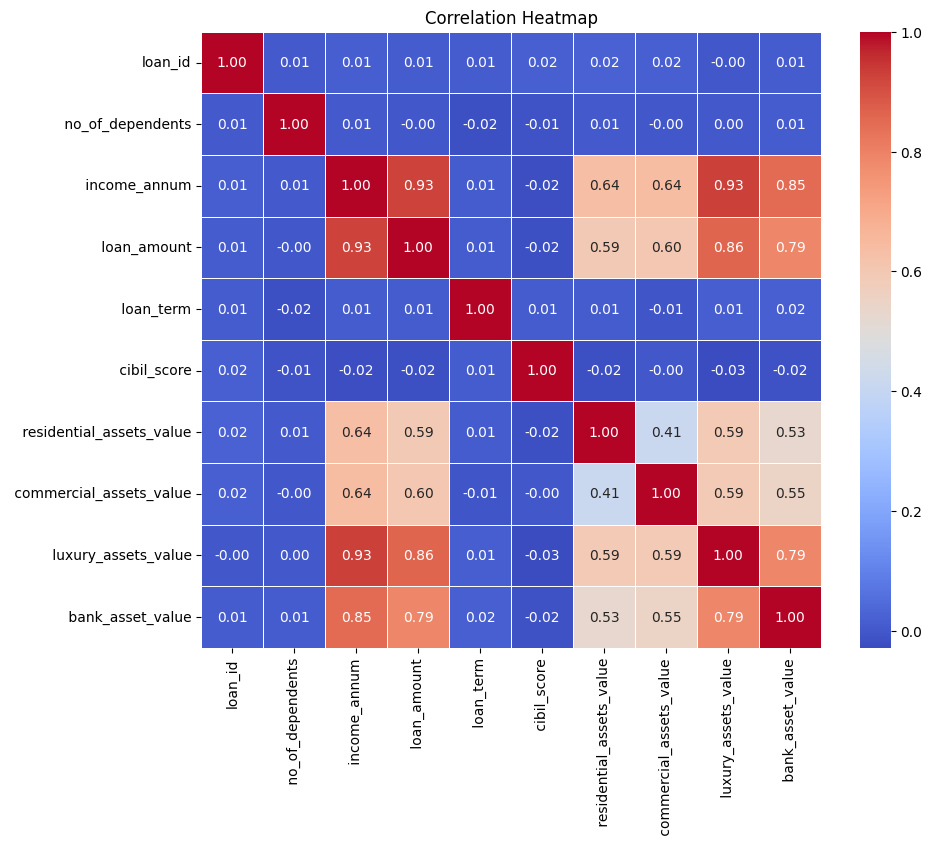

In [47]:
# Select only the numeric columns for correlation calculation
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [29]:
pip install pandas scikit-learn xgboost


     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.6/70.9 MB 12.5 MB/s eta 0:00:06
      --------------------------------------- 1.3/70.9 MB 12.0 MB/s eta 0:00:06
     - -------------------------------------- 2.0/70.9 MB 11.9 MB/s eta 0:00:06
     - -------------------------------------- 2.8/70.9 MB 11.7 MB/s eta 0:00:06
     - -------------------------------------- 3.4/70.9 MB 11.5 MB/s eta 0:00:06
     -- ------------------------------------- 3.9/70.9 MB 11.4 MB/s eta 0:00:06
     -- ------------------------------------- 4.4/70.9 MB 11.4 MB/s eta 0:00:06
     -- ------------------------------------- 4.9/70.9 MB 11.2 MB/s eta 0:00:06
     --- ------------------------------------ 5.4/70.9 MB 10.7 MB/s eta 0:00:07
     --- ------------------------------------ 6.0/70.9 MB 10.9 MB/s eta 0:00:06
     --- ------------------------------------ 6.5/70.9 MB 11.0 MB/s eta 0:00:06
     ---- ----------------------------------- 7.

In [38]:
# Load the data
data = pd.read_csv('loan_approval_dataset.csv')

# Remove leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Separate features and target variable
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Encode target variable (Approved: 1, Rejected: 0)
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("\nDecision Trees Accuracy:", dt_accuracy)
print("Decision Trees Classification Report:")
print(classification_report(y_test, dt_predictions))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

# Support Vector Machines (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("\nSupport Vector Machines Accuracy:", svm_accuracy)
print("Support Vector Machines Classification Report:")
print(classification_report(y_test, svm_predictions))

# Gradient Boosting (XGBoost)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("\nGradient Boosting (XGBoost) Accuracy:", xgb_accuracy)
print("Gradient Boosting (XGBoost) Classification Report:")
print(classification_report(y_test, xgb_predictions))


Logistic Regression Accuracy: 0.9074941451990632
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854


Decision Trees Accuracy: 0.9765807962529274
Decision Trees Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       536
           1       0.98      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854


Random Forest Accuracy: 0.9742388758782201
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99  

The models evaluated are Logistic Regression, Decision Trees, Random Forest, Support Vector Machines (SVM), and Gradient Boosting (XGBoost).

Logistic Regression Accuracy: 0.9074941451990632
The logistic regression model achieved an accuracy of approximately 90.75%. The classification report provides additional insights into the model's performance for each class (0 and 1) and includes metrics such as precision, recall, and F1-score.

For class 0, the model achieved a precision of 0.92, which means that when it predicted a sample as class 0, it was correct 92% of the time. The recall, which measures the model's ability to correctly identify class 0 instances, was 0.93, indicating that the model correctly identified 93% of all class 0 instances. The F1-score, a harmonic mean of precision and recall, was 0.93.

For class 1, the model achieved a precision of 0.88, meaning that when it predicted a sample as class 1, it was correct 88% of the time. The recall for class 1 was 0.86, suggesting that the model correctly identified 86% of all class 1 instances. The F1-score for class 1 was 0.87.

Decision Trees Accuracy: 0.9765807962529274
The decision trees model achieved a high accuracy of approximately 97.66%. The classification report shows excellent performance for both classes (0 and 1).

For class 0, the precision was 0.98, the recall was 0.99, and the F1-score was 0.98. For class 1, the precision was 0.98, the recall was 0.96, and the F1-score was 0.97. These metrics indicate that the model performed very well in distinguishing both classes.

Random Forest Accuracy: 0.9742388758782201
The random forest model achieved an accuracy of about 97.42%. Similar to the decision trees, the random forest model showed strong performance for both classes.

For class 0, the precision was 0.97, the recall was 0.99, and the F1-score was 0.98. For class 1, the precision was 0.97, the recall was 0.96, and the F1-score was 0.97. These metrics demonstrate the model's ability to effectively classify both classes.

Support Vector Machines (SVM) Accuracy: 0.9297423887587822
The support vector machines model achieved an accuracy of around 92.97%. The model performed well, although not as high as the decision trees and random forest models.

For class 0, the precision was 0.95, the recall was 0.94, and the F1-score was 0.94. For class 1, the precision was 0.90, the recall was 0.92, and the F1-score was 0.91. These metrics show the model's capability in classifying both classes, but with slightly lower performance compared to decision trees and random forest.

Gradient Boosting (XGBoost) Accuracy: 0.9847775175644028
The gradient boosting (XGBoost) model achieved an impressive accuracy of approximately 98.48%, which is the highest accuracy among the evaluated models.

For class 0, the precision was 0.99, the recall was 0.99, and the F1-score was 0.99. For class 1, the precision was 0.98, the recall was 0.98, and the F1-score was 0.98. These metrics indicate outstanding performance in correctly classifying both classes.



# In summary, the gradient boosting (XGBoost) model showed the highest accuracy and performed exceptionally well in classifying both classes. It achieved the highest precision, recall, and F1-score for both class 0 and class 1. The decision trees and random forest models also demonstrated strong performance, while the logistic regression and support vector machines models achieved good but slightly lower accuracy and classification metrics.